In [1]:
pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

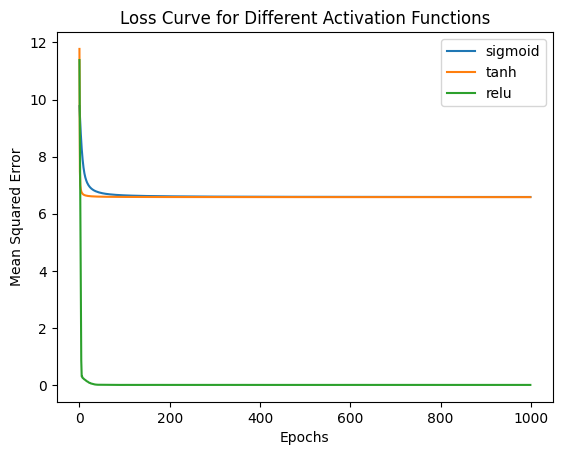

In [3]:
np.random.seed(42)
X = np.random.rand(100, 1)
y_true = 3 * X + 2 + 0.1 * np.random.randn(100, 1)


# Define neural network model with different activation functions
def create_model(activation_function):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation=activation_function, input_shape=(1,)),
        tf.keras.layers.Dense(10, activation=activation_function),
        tf.keras.layers.Dense(10, activation=activation_function),
        tf.keras.layers.Dense(1, activation=activation_function),
    ])
    model.compile(optimizer="sgd", loss="mse")
    return model


# Training
epochs = 1000
activation_functions = ["sigmoid", "tanh", "relu"]
losses = []

for activation_function in activation_functions:
    model = create_model(activation_function)
    history = model.fit(X, y_true, epochs=epochs, verbose=0)
    losses.append(history.history["loss"])

# Plotting the loss curves
for i, activation_function in enumerate(activation_functions):
    plt.plot(losses[i], label=activation_function)

plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Loss Curve for Different Activation Functions")
plt.legend()
plt.show()